# Australian Radio Talkback Corpus Presentation

In [1]:
%pprint

Pretty printing has been turned OFF


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import nltk
import pandas as pd

# visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

## Reading in Data Frames

In [4]:
# reading in data frames
speaker_df=pd.read_csv("data_files/Speakers.csv")
art_df=pd.read_csv("data_files/Texts.csv")
bk_df=pd.read_csv("data_files/Back_Channels.csv")

# speaker_df.head()
# art_df.head()
# bk_df.head()

## Data Frames:

- speaker_df
    - data frame of all unique speakers
- art_df
    - data frame of each line of text
- bk_df
    - data frame of all back channels

In [5]:
# modifying data frame column names
speaker_df.columns = ["Speaker","Segment","Speaker_Type","Gender","Name","Number_of_Utterances"]
speaker_df = speaker_df.set_index("Speaker")
speaker_df.head()

art_df.columns = ["Speaker","Utterance_Number","Segment","Speaker_Type","Gender","Text","Word_Toks","Num_Words","Avg_Word_Length","Sents","Num_Sents"]
art_df = art_df.set_index(keys=["Speaker","Utterance_Number"])
art_df.head()

bk_df.columns = ["","Speaker","Speaker_Type","Speaker_Gender","Back_Channel","Line_Speaker","Segment_Utterance_Number","Segment","Line_Speaker_Type","Line_Speaker_Gender"]
bk_df = bk_df.set_index("")
bk_df.head()

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-C1,ABCE1,C,F,Suzanne,17
ABCE1-C10,ABCE1,C,F,Beth,17
ABCE1-C11,ABCE1,C,F,Lynne,10
ABCE1-C12,ABCE1,C,M,Jack,12
ABCE1-C2,ABCE1,C,F,Lisa,13


,,Segment,Speaker_Type,Gender,Text,Word_Toks,Num_Words,Avg_Word_Length,Sents,Num_Sents
Speaker,Utterance_Number,,,,,,,,,
ABCE1-P1,1,ABCE1,P,M,Thanks for that John Hall now John Hall will b...,"['Thanks', 'for', 'that', 'John', 'Hall', 'now...",80,4.700000,"[""Thanks for that John Hall now John Hall will...",2
ABCE1-E1,2,ABCE1,E,M,I guess yeah yeah <laughs>.,"['I', 'guess', 'yeah', 'yeah', '.']",5,3.000000,['I guess yeah yeah .'],1
ABCE1-P1,3,ABCE1,P,M,He's also known <E1 sounds reasonable> for his...,"['He', ""'s"", 'also', 'known', 'for', 'his', 'a...",159,5.062893,"[""He's also known for his ability to open cos...",3
ABCE1-E1,4,ABCE1,E,M,Okay.,"['Okay', '.']",2,2.500000,['Okay.'],1
ABCE1-P1,5,ABCE1,P,M,Jeanne Villani does and we'll find out the sec...,"['Jeanne', 'Villani', 'does', 'and', 'we', ""'l...",50,3.980000,"[""Jeanne Villani does and we'll find out the s...",1


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
0,ABCE1-E1,E,sounds reasonable,ABCE1-P1,3,ABCE1,P,M,NaN
1,ABCE1-C1,C,laughs,ABCE1-P1,10,ABCE1,P,M,NaN
2,ABCE1-P1,P,yes,ABCE1-C1,11,ABCE1,C,F,NaN
3,ABCE1-E1,E,mm,ABCE1-C1,11,ABCE1,C,F,NaN
4,ABCE1-E1,E,mm,ABCE1-C1,11,ABCE1,C,F,NaN


### Speakers Split by Role:

In [6]:
# dataframe of presenters
P_df=speaker_df.loc[speaker_df["Speaker_Type"]=='P',:]

# dataframe of callers
C_df=speaker_df.loc[speaker_df["Speaker_Type"]=='C',:]

# dataframe of experts
E_df=speaker_df.loc[speaker_df["Speaker_Type"]=='E',:]

In [7]:
P_df

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68


### How many Speakers are there for each Role?

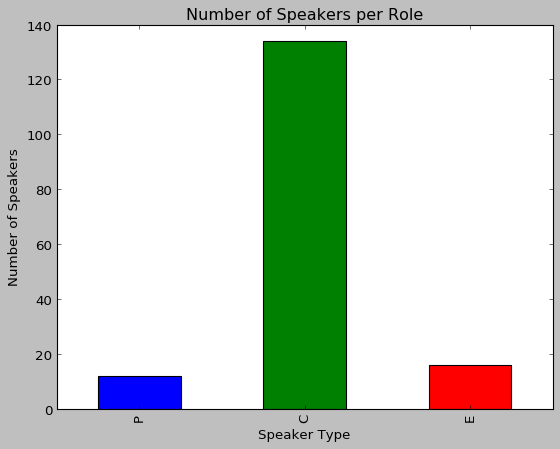

In [8]:
# Number of Speakers per Role
speaker_df["Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Number of Speakers per Role")
plt.xlabel("Speaker Type")
plt.ylabel("Number of Speakers")
plt.show()

### How often do these speakers talk throughout the corpus?

In [9]:
print("Total number of turns:")
P_df["Number_of_Utterances"].sum()
C_df["Number_of_Utterances"].sum()
E_df["Number_of_Utterances"].sum() 

print("Average number of turns per speaker in each role:")
P_df["Number_of_Utterances"].mean()
C_df["Number_of_Utterances"].mean()
E_df["Number_of_Utterances"].mean()

Total number of turns:


1470

1505

1464

Average number of turns per speaker in each role:


122.5

11.23134328358209

91.5

Across the corpus, the three speaker types have about the same number of total turns. So even though there are more callers speaking fewer lines and fewer presenters speaking more lines, the corpus is equally represented in regards to the number of turns by speaker type.

### Average Sentence Length by Speaker Type:

In [10]:
# These numbers come from cells 44 - 45 in process-art-corpus.ipynb
# and are based on the .describe() method

print("Avg Length of Presenter Sentences:",str(23.700680/1.542177))
print("Avg Length of Caller Sentences:",str(16.950166/1.320266))
print("Avg Length of Expert Sentences:",str(30.517760/1.637978))

Avg Length of Presenter Sentences: 15.368326722548709
Avg Length of Caller Sentences: 12.838447706750003
Avg Length of Expert Sentences: 18.63136134917563


### How many Males vs. Females?

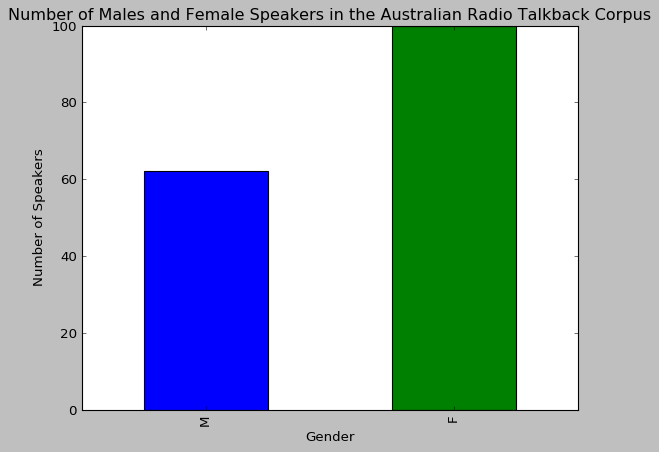

In [11]:
speaker_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Number of Males and Female Speakers in the Australian Radio Talkback Corpus")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

### How do Males and Females compare by Role?

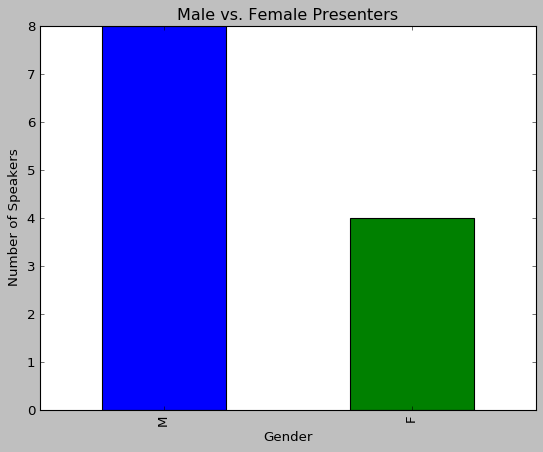

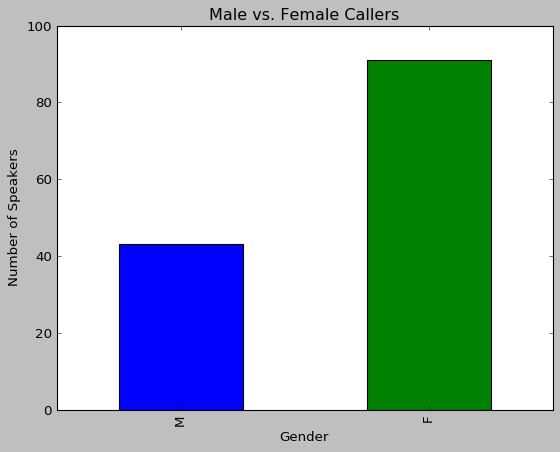

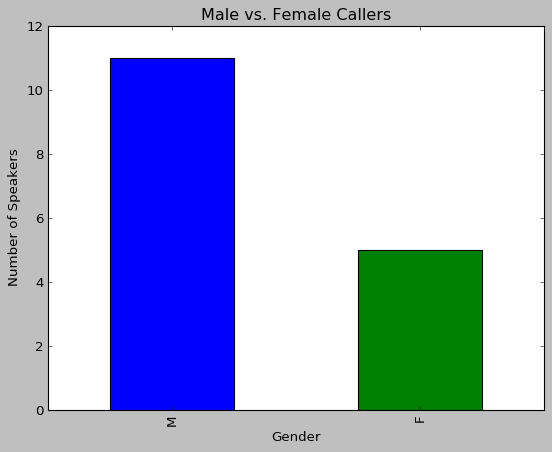

In [12]:
P_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male vs. Female Presenters")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

C_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male vs. Female Callers")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

E_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male vs. Female Callers")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

### What Speaker Type has the most Back Channels?

Callers

In [13]:
# number of back channels per speaker type
bk_df["Speaker_Type"].value_counts().reindex(["P","C","E"])

P    491
C    968
E    758
Name: Speaker_Type, dtype: int64

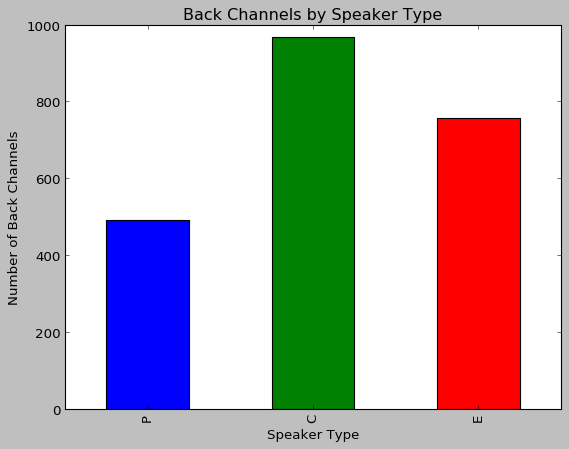

In [14]:
bk_df["Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Back Channels by Speaker Type")
plt.xlabel("Speaker Type")
plt.ylabel("Number of Back Channels")
plt.show()

### What Speaker Type has the most number of Back Channels uttered during their lines?

Experts

In [15]:
bk_df["Line_Speaker_Type"].value_counts().reindex(["P","C","E"])

P    40
C    30
E    12
Name: Line_Speaker_Type, dtype: int64

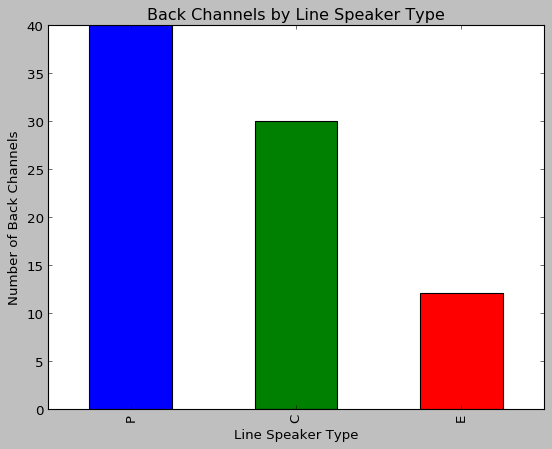

In [16]:
bk_df["Line_Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Back Channels by Line Speaker Type")
plt.xlabel("Line Speaker Type")
plt.ylabel("Number of Back Channels")
plt.show()

### What are the Back Channels? Which ones are most common?

In [17]:
bk_df["Back_Channel"].value_counts()[:20]

COME5-P2     319
COME1-E1     202
COME3-E1     127
ABCE2-P1     124
ABCE2-E2     100
ABCE2-E1      94
ABCE1-E1      82
ABCNE2-E1     79
laugh         78
COME2-E1      76
ABCE3-P1      72
ABCE3-P2      45
ABCE4-E1      40
ABCNE1-E1     40
ABCE1-P1      35
COME1-P1      22
COME5-P1      20
ABCNE1-P1     18
COME2-P1      18
ABCE1-C12     18
Name: Back_Channel, dtype: int64